5 Load a time series dataset (e.g., AirPassengers), plot the original series,
and decompose it into trend, seasonality, and residual components

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
data=pd.read_csv('AirPassengers.csv')

In [33]:
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [34]:
print(data.head())

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121


In [35]:
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


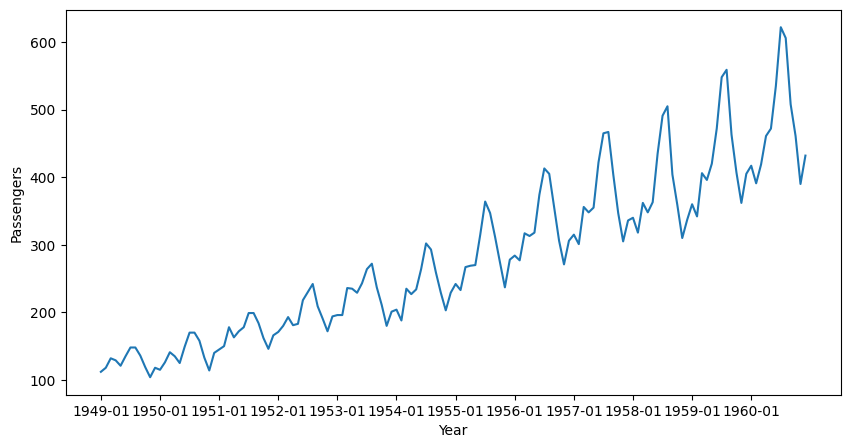

In [38]:
plt.figure(figsize=(10,5))
plt.plot(data['Month'], data['#Passengers'])

plt.xticks(data['Month'][::12])  # har 12th month ka label
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.show()


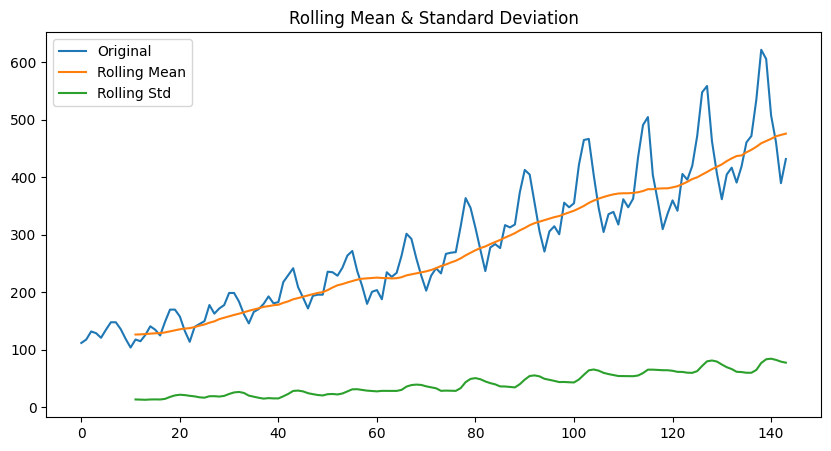

In [40]:
rolling_mean = data['#Passengers'].rolling(window=12).mean()
rolling_std  = data['#Passengers'].rolling(window=12).std()

plt.figure(figsize=(10,5))
plt.plot(data['#Passengers'], label='Original')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_std, label='Rolling Std')
plt.legend()
plt.title("Rolling Mean & Standard Deviation")
plt.show()


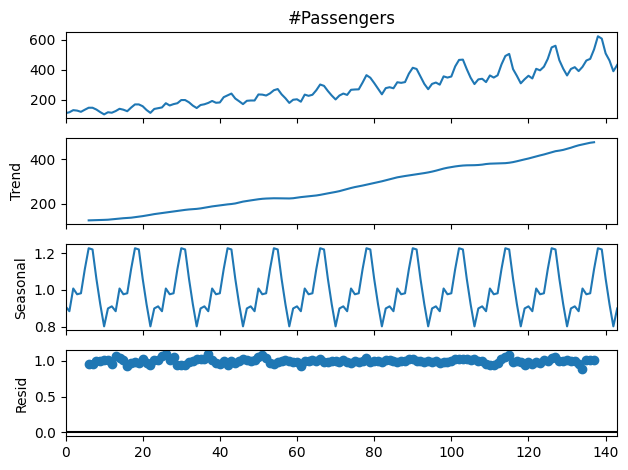

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(
    data['#Passengers'],
    model='multiplacative',
    period=12
)
decomposition.plot()
plt.show()

7 Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to
detect anomalies. Visualize the anomalies on a 2D scatter plot.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
data=pd.read_csv('NYC_taxi_fare_data.csv')

/var/folders/lt/92vvt3256lg5xyfxxq3r52zw0000gn/T/ipykernel_77785/1181386487.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('NYC_taxi_fare_data.csv')


In [4]:
data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.00,0.00,0.3,21.14,0.0
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.00,12.24,0.3,62.46,0.0
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.00,0.00,0.3,51.90,0.0
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.00,0.00,0.3,30.22,0.0


In [5]:
data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

In [6]:
data.isnull()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,True,False,False,True,False,True,True,False,False,True,False,False,False,False,False,False,False,False
6405004,True,False,False,True,False,True,True,False,False,True,False,False,False,False,False,False,False,False
6405005,True,False,False,True,False,True,True,False,False,True,False,False,False,False,False,False,False,False
6405006,True,False,False,True,False,True,True,False,False,True,False,False,False,False,False,False,False,False


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6405008 entries, 0 to 6405007
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               float64
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           float64
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(13), int64(2), object(3)
memory usage: 879.6+ MB


In [8]:
data.shape

(6405008, 18)

In [9]:
data.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,6.339567e+06,6.339567e+06,6.405008e+06,6.339567e+06,6.405008e+06,6.405008e+06,6.339567e+06,6.405008e+06,6.405008e+06,6.405008e+06,6.405008e+06,6.405008e+06,6.405008e+06,6.405008e+06,6.405008e+06
mean,1.669624e+00,1.515333e+00,2.929644e+00,1.059908e+00,1.647323e+02,1.626627e+02,1.270298e+00,1.269411e+01,1.115456e+00,4.923182e-01,2.189342e+00,3.488395e-01,2.979870e-01,1.866315e+01,2.275662e+00
std,4.703484e-01,1.151594e+00,8.315911e+01,8.118432e-01,6.554374e+01,6.991261e+01,4.739985e-01,1.212730e+01,1.260054e+00,7.374184e-02,2.760028e+00,1.766978e+00,3.385937e-02,1.475736e+01,7.352646e-01
min,1.000000e+00,0.000000e+00,-3.062000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.238000e+03,-2.700000e+01,-5.000000e-01,-9.100000e+01,-3.574000e+01,-3.000000e-01,-1.242300e+03,-2.500000e+00
25%,1.000000e+00,1.000000e+00,9.600000e-01,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.116000e+01,2.500000e+00
50%,2.000000e+00,1.000000e+00,1.600000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,1.950000e+00,0.000000e+00,3.000000e-01,1.430000e+01,2.500000e+00
75%,2.000000e+00,2.000000e+00,2.930000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.000000e+00,1.400000e+01,2.500000e+00,5.000000e-01,2.860000e+00,0.000000e+00,3.000000e-01,1.980000e+01,2.500000e+00
max,2.000000e+00,9.000000e+00,2.102401e+05,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,4.265000e+03,1.130100e+02,3.080000e+01,1.100000e+03,9.105000e+02,3.000000e-01,4.268300e+03,2.750000e+00


In [10]:
data.isnull().sum()

VendorID                 65441
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          65441
trip_distance                0
RatecodeID               65441
store_and_fwd_flag       65441
PULocationID                 0
DOLocationID                 0
payment_type             65441
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
dtype: int64

In [11]:
data.isnull().sum().sort_values(ascending=False)

VendorID                 65441
RatecodeID               65441
store_and_fwd_flag       65441
payment_type             65441
passenger_count          65441
trip_distance                0
tpep_dropoff_datetime        0
PULocationID                 0
DOLocationID                 0
tpep_pickup_datetime         0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
dtype: int64

In [12]:
cols = ['trip_distance', 'fare_amount', 'total_amount']
df = data[cols]


In [13]:
df

,trip_distance,fare_amount,total_amount
0,1.20,6.00,11.27
1,1.20,7.00,12.30
2,0.60,6.00,10.80
3,0.80,5.50,8.16
4,0.00,3.50,4.80
...,...,...,...
6405003,3.24,17.59,21.14
6405004,22.13,46.67,62.46
6405005,10.51,48.85,51.90
6405006,5.49,27.17,30.22


In [14]:
df=df[
    (df['trip_distance']>0)&
    (df['fare_amount']>0)&
    (df['total_amount']>0)
]

In [15]:
df_sample = df.sample(10000, random_state=42)

In [16]:


from sklearn.preprocessing import StandardScaler

In [17]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(df_sample)

In [18]:
x_scaled

array([[-0.28541996, -0.32110455, -0.23222572],
       [-0.45471886, -0.5490766 , -0.7960223 ],
       [-0.30922762, -0.22991574, -0.18747996],
       ...,
       [-0.47323593, -0.45788778, -0.45147995],
       [ 0.11931023,  0.04365072,  0.0809946 ],
       [-0.69279544, -0.82264306, -0.87059857]], shape=(10000, 3))

In [19]:
from sklearn.ensemble import IsolationForest

In [20]:
iso=IsolationForest(
    contamination=0.02,
    random_state=42
)
df_sample['anomaly']=iso.fit_predict(x_scaled)


In [21]:
df_sample

,trip_distance,fare_amount,total_amount,anomaly
2120797,1.84,9.0,15.36,1
3929602,1.20,6.5,7.80,1
4700155,1.75,10.0,15.96,1
4840496,1.35,6.5,11.84,1
2743670,1.38,10.0,15.96,1
...,...,...,...,...
103330,0.60,5.0,9.95,1
5370361,0.85,5.0,10.30,1
4205276,1.13,7.5,12.42,1
5883068,3.37,13.0,19.56,1


In [22]:
import matplotlib.pyplot as plt

In [23]:
df_viz = df_sample[
    (df_sample['trip_distance'] < 100) &
    (df_sample['fare_amount'] < 500)
]
normal_viz = df_viz[df_viz['anomaly'] == 1]
anomaly_viz = df_viz[df_viz['anomaly'] == -1]


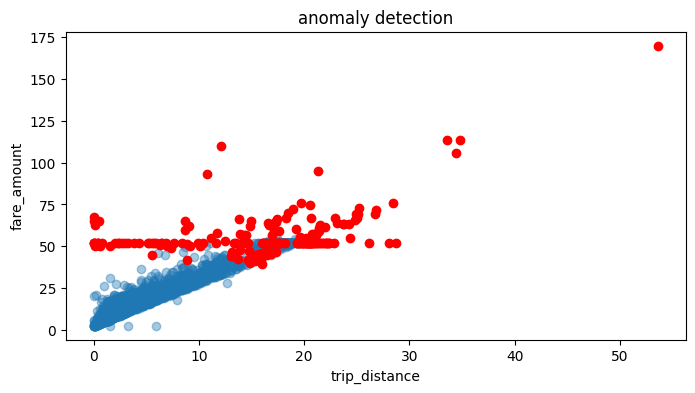

In [24]:
plt.figure(figsize=(8,4))
plt.scatter(normal_viz['trip_distance'],normal_viz['fare_amount'],alpha=0.4,label='normal')
plt.scatter(anomaly_viz['trip_distance'],anomaly_viz['fare_amount'],c='red',label='anomaly')
plt.xlabel('trip_distance')
plt.ylabel('fare_amount')

plt.title("anomaly detection")
plt.show()

8 Train a SARIMA model on the monthly airline passengers dataset.
Forecast the next 12 months and visualize the results.

In [29]:
import pandas as pd

data=pd.read_csv("AirPassengers.csv")
data['Month']=pd.to_datetime(data['Month'])
data=data.set_index('Month')
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


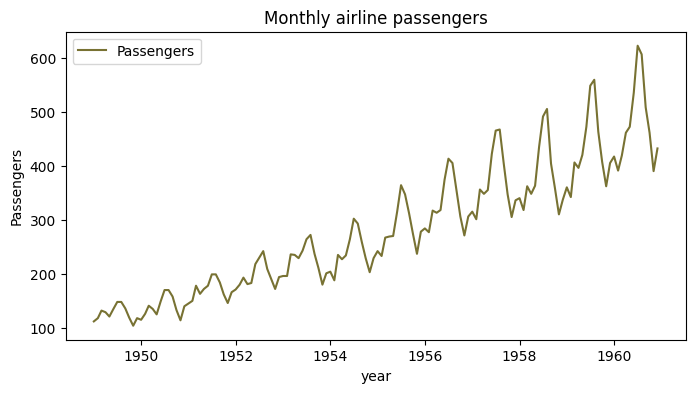

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot(data['#Passengers'],label='Passengers',c='#787233')
plt.title("Monthly airline passengers")
plt.xlabel('year')
plt.ylabel('Passengers')
plt.legend()
plt.show()



In [40]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model=SARIMAX(
    data['#Passengers'],
    order=(1,1,1),
    seasonal_order=(1,1,1,12),
    enforce_stationarity=False,
    enforce_invertibility=False
)
result=model.fit()
print(result.summary())

/Users/afaquemogni/myenv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/afaquemogni/myenv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                        #Passengers   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -456.103
Date:                            Fri, 16 Jan 2026   AIC                            922.205
Time:                                    15:48:18   BIC                            936.016
Sample:                                01-01-1949   HQIC                           927.812
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2298      0.401     -0.573      0.567      -1.016       0.557
ma.L1         -0.0987      0.374   

In [42]:
forecast=result.get_forecast(steps=12)
forecast_mean=forecast.predicted_mean
forecast_ci=forecast.conf_int()

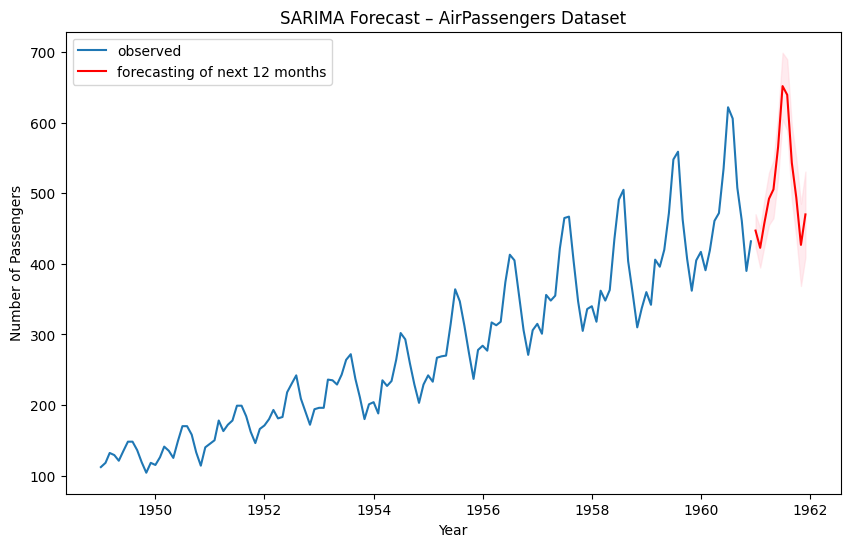

In [49]:
plt.figure(figsize=(10,6))
plt.plot(data['#Passengers'],label='observed')
plt.plot(forecast_mean,label='forecasting of next 12 months',c='red')
plt.fill_between(
    forecast_ci.index,
    forecast_ci.iloc[:,0],
    forecast_ci.iloc[:,1],
    color='pink',
    alpha=0.3
)
plt.title("SARIMA Forecast – AirPassengers Dataset")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()
    

9  Apply Local Outlier Factor (LOF) on any numerical dataset to detect
anomalies and visualize them using matplotlib.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler

In [3]:
df=pd.read_csv('NYC_taxi_fare_data.csv')

/var/folders/lt/92vvt3256lg5xyfxxq3r52zw0000gn/T/ipykernel_97878/2388840490.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('NYC_taxi_fare_data.csv')


In [4]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.00,0.00,0.3,21.14,0.0
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.00,12.24,0.3,62.46,0.0
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.00,0.00,0.3,51.90,0.0
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.00,0.00,0.3,30.22,0.0


In [5]:
df.shape

(6405008, 18)

In [9]:
cols=['trip_distance','fare_amount','total_amount']

In [10]:
cols

['trip_distance', 'fare_amount', 'total_amount']

In [11]:
df_num=df[cols].copy()

In [12]:
df_num

,trip_distance,fare_amount,total_amount
0,1.20,6.00,11.27
1,1.20,7.00,12.30
2,0.60,6.00,10.80
3,0.80,5.50,8.16
4,0.00,3.50,4.80
...,...,...,...
6405003,3.24,17.59,21.14
6405004,22.13,46.67,62.46
6405005,10.51,48.85,51.90
6405006,5.49,27.17,30.22


In [13]:
df_num.isnull().sum()

trip_distance    0
fare_amount      0
total_amount     0
dtype: int64

In [14]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6405008 entries, 0 to 6405007
Data columns (total 3 columns):
 #   Column         Dtype  
---  ------         -----  
 0   trip_distance  float64
 1   fare_amount    float64
 2   total_amount   float64
dtypes: float64(3)
memory usage: 146.6 MB


In [15]:
df_sample=df_num.sample(10000,random_state=42)

In [16]:
df_sample

,trip_distance,fare_amount,total_amount
3340840,3.60,18.5,27.36
4887036,3.28,14.0,19.00
2737398,1.75,8.5,13.00
1452246,0.87,5.5,8.80
5124188,0.98,5.5,8.80
...,...,...,...
3315347,1.20,8.5,12.80
1892145,24.18,65.5,106.00
4282706,1.50,8.5,15.35
4212139,1.50,11.0,17.15


In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler=StandardScaler()

In [22]:
x_scaled=scaler.fit_transform(df_sample)

In [23]:
x_scaled

array([[ 0.18261169,  0.47852741,  0.58683279],
       [ 0.09831741,  0.10173318,  0.0162654 ],
       [-0.30471457, -0.35879309, -0.39323273],
       ...,
       [-0.37056947, -0.35879309, -0.23284596],
       [-0.37056947, -0.14946296, -0.10999652],
       [-0.39427724, -0.27506104, -0.23216346]], shape=(10000, 3))

In [25]:
lof=LocalOutlierFactor(n_neighbors=20,contamination=0.02)
y_pred=lof.fit_predict(x_scaled)

In [26]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], shape=(10000,))

In [27]:
df_sample['anomaly']=y_pred

In [28]:
df_sample

,trip_distance,fare_amount,total_amount,anomaly
3340840,3.60,18.5,27.36,1
4887036,3.28,14.0,19.00,1
2737398,1.75,8.5,13.00,1
1452246,0.87,5.5,8.80,1
5124188,0.98,5.5,8.80,1
...,...,...,...,...
3315347,1.20,8.5,12.80,1
1892145,24.18,65.5,106.00,1
4282706,1.50,8.5,15.35,1
4212139,1.50,11.0,17.15,1


In [29]:
normal=df_sample[df_sample['anomaly']==1]
anomaly=df_sample[df_sample['anomaly']==-1]

In [30]:
normal

,trip_distance,fare_amount,total_amount,anomaly
3340840,3.60,18.5,27.36,1
4887036,3.28,14.0,19.00,1
2737398,1.75,8.5,13.00,1
1452246,0.87,5.5,8.80,1
5124188,0.98,5.5,8.80,1
...,...,...,...,...
3315347,1.20,8.5,12.80,1
1892145,24.18,65.5,106.00,1
4282706,1.50,8.5,15.35,1
4212139,1.50,11.0,17.15,1


In [31]:
anomaly

,trip_distance,fare_amount,total_amount,anomaly
3003246,0.00,14.0,20.76,-1
4133864,0.74,4.0,9.36,-1
871984,0.97,6.0,8.16,-1
790310,1.28,7.5,9.96,-1
5101094,0.90,5.0,8.30,-1
...,...,...,...,...
4491268,0.59,6.5,13.50,-1
5858889,0.37,3.0,8.16,-1
543105,0.94,6.0,8.16,-1
1575063,0.90,2.5,6.80,-1


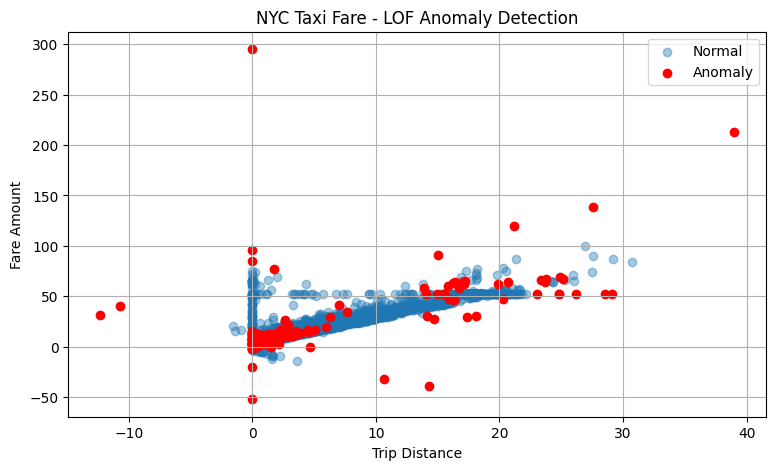

In [32]:
plt.figure(figsize=(9, 5))
plt.scatter(normal["trip_distance"], normal["fare_amount"], alpha=0.4, label="Normal")
plt.scatter(anomaly["trip_distance"], anomaly["fare_amount"], color="red", label="Anomaly")

plt.xlabel("Trip Distance")
plt.ylabel("Fare Amount")
plt.title("NYC Taxi Fare - LOF Anomaly Detection")
plt.legend()
plt.grid(True)
plt.show()